### Packages loading

In [10]:
import sys
sys.path.insert(0, '..')
import numpy as np
import random
import qiskit
import qtm.evolution
import qtm.state
import qtm.qcompilation
import qtm.ansatz
import qtm.constant
from qtm.evolution import environment, mutate, selection, crossover, utils
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


## 1. Quantum architecture search for quantum state preparation problem

Now, we defind the problem which is need to solve

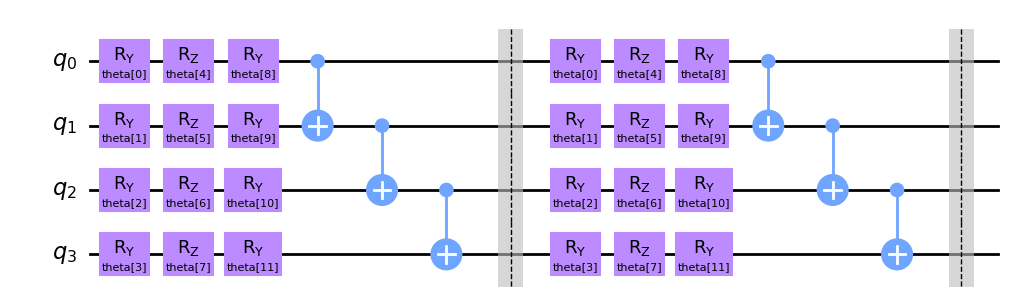

In [2]:
# n_qubits=4
# n=3
# theta = qiskit.circuit.ParameterVector('theta',n*n_qubits)
# #theta = np.random.rand(n*n_qubits)
# #print(theta)
# qc = qiskit.QuantumCircuit(n_qubits)
# #theta = [0,1,2]
# for j in range (2):
#     for i in range(n_qubits):
#         qc.ry(theta[i], i)
#     for i in range(n_qubits):
#         qc.rz(theta[i+n+1], i)
#     for i in range(n_qubits):
#         qc.ry(theta[i+2*(n+1)], i)
#     qc.cnot(0, 1)
#     qc.cnot(1, 2)
#     qc.cnot(2, 3)
#     qc.barrier()
# qc.draw('mpl')

In [1]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter, ParityMapper
from qiskit_nature.units import DistanceUnit

driver = PySCFDriver(
    atom="H 0 0 -0.35; H 0 0 0.35",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
problem = driver.run()
hamiltonian = problem.hamiltonian.second_q_op()

mapper=JordanWignerMapper()
qubit_converter = QubitConverter(mapper)
qubit_op = qubit_converter.convert(hamiltonian)
print(qubit_op)

-0.7980464206492509 * IIII
+ 0.17771287465139923 * IIIZ
- 0.242742805131405 * IIZI
+ 0.17771287465139918 * IZII
- 0.24274280513140495 * ZIII
+ 0.1229330505618381 * IIZZ
+ 0.17059738328801052 * IZIZ
+ 0.044750144015351635 * YYYY
+ 0.044750144015351635 * XXYY
+ 0.044750144015351635 * YYXX
+ 0.044750144015351635 * XXXX
+ 0.16768319457718972 * ZIIZ
+ 0.16768319457718972 * IZZI
+ 0.17627640804319608 * ZIZI
+ 0.1229330505618381 * ZZII


/home/viet/miniconda3/envs/textoir/lib/python3.8/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '
/tmp/ipykernel_8326/2063267724.py:16: DeprecationWarning: The QubitConverter class is deprecated as of version 0.6.0 and will be removed no sooner than 3 months after the release . Instead you should directly use the QubitMapper instance which you used to pass into the QubitConverter as the first argument. Refer to the documentation of the qiskit_nature.second_q.mappers module for more information.
  qubit_converter = QubitConverter(mapper)
/home/viet/miniconda3/envs/textoir/lib/python3.8/site-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: P

In [2]:

print(qubit_op)

-0.7980464206492509 * IIII
+ 0.17771287465139923 * IIIZ
- 0.242742805131405 * IIZI
+ 0.17771287465139918 * IZII
- 0.24274280513140495 * ZIII
+ 0.1229330505618381 * IIZZ
+ 0.17059738328801052 * IZIZ
+ 0.044750144015351635 * YYYY
+ 0.044750144015351635 * XXYY
+ 0.044750144015351635 * YYXX
+ 0.044750144015351635 * XXXX
+ 0.16768319457718972 * ZIIZ
+ 0.16768319457718972 * IZZI
+ 0.17627640804319608 * ZIZI
+ 0.1229330505618381 * ZZII


In [11]:
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.primitives import Estimator
estimator = Estimator()
def VQE_fitness(qc: qiskit.QuantumCircuit, num_iter = 10):
    from qiskit_nature.second_q.drivers import PySCFDriver
    from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter, ParityMapper
    from qiskit_nature.units import DistanceUnit

    driver = PySCFDriver(
        atom="H 0 0 -0.35; H 0 0 0.35",
        basis="sto3g",
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM,
    )
    problem = driver.run()
    hamiltonian = problem.hamiltonian.second_q_op()

    mapper=JordanWignerMapper()
    qubit_converter = QubitConverter(mapper)
    qubit_op = qubit_converter.convert(hamiltonian)
    vqe = VQE(estimator = estimator, ansatz = qc, optimizer=qiskit.algorithms.optimizers.SLSQP(maxiter=num_iter))
    return vqe.compute_minimum_eigenvalue(qubit_op).eigenvalue.real

theta, ['theta[0]', 'theta[1]', 'theta[2]', 'theta[3]', 'theta[4]', 'theta[5]', 'theta[6]']


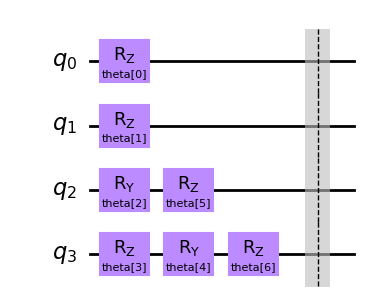

In [12]:
n_qubits=4
theta = qiskit.circuit.ParameterVector('theta',7)
# theta = np.random.rand(7)
print(theta)
qc = qiskit.QuantumCircuit(n_qubits)
qc.rz(theta[0],qubit=0)
qc.rz(theta[1],qubit=1)
qc.ry(theta[2],qubit=2)
qc.rz(theta[3],qubit=3)
qc.ry(theta[4],qubit=3)
qc.rz(theta[5],qubit=2)
qc.rz(theta[6],qubit=3)
qc.barrier()
qc.draw('mpl')

/tmp/ipykernel_1569/3182541717.py:2: DeprecationWarning: The ``qiskit.opflow`` module is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  from qiskit.opflow import I,X,Y,Z


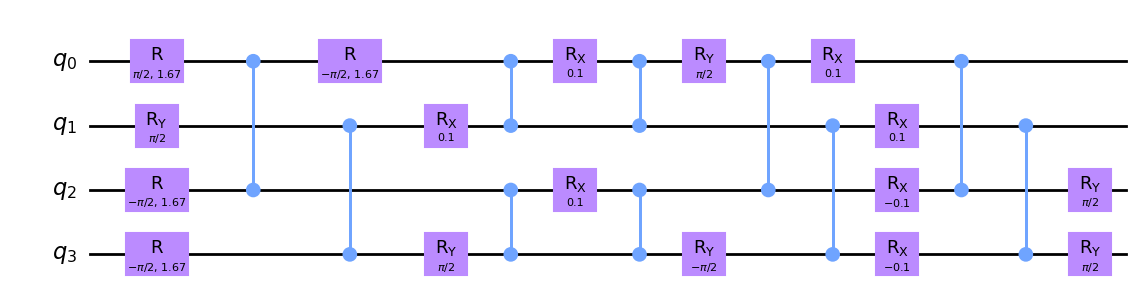

In [1]:
import qiskit 
from qiskit.opflow import I,X,Y,Z
from qiskit.quantum_info import SparsePauliOp
import numpy as np 

gamma_1 = 0.1
gamma_2 = 0.1
alpha_1 = 0.1
alpha_2 = 0.1

qc = qiskit.QuantumCircuit(4)


qc.r(np.pi/2,np.pi/2+gamma_1,qubit=0)
qc.ry(np.pi/2,qubit=1)
qc.r(-np.pi/2,np.pi/2+gamma_1,qubit=2)
qc.r(-np.pi/2,np.pi/2+gamma_1,qubit=3)
qc.cz(0,2)
qc.cz(1,3)
qc.r(-np.pi/2,np.pi/2+gamma_1,qubit=0)
qc.rx(gamma_1,qubit=1)
qc.ry(np.pi/2,qubit=3)
qc.cz(0,1)
qc.cz(2,3)
qc.rx(gamma_2,qubit=0)
qc.rx(gamma_2,qubit=2)
qc.cz(0,1)
qc.cz(2,3)
qc.ry(np.pi/2,qubit=0)
qc.ry(-np.pi/2,qubit=3)
qc.cz(0,2)
qc.cz(1,3)
qc.rx(alpha_1,qubit=0)
qc.rx(alpha_1,qubit=1)
qc.rx(-alpha_2,qubit=2)
qc.rx(-alpha_2,qubit=3)
qc.cz(0,2)
qc.cz(1,3)
qc.ry(np.pi/2,qubit=2)
qc.ry(np.pi/2,qubit=3)
qc.draw('mpl')

In [13]:
VQE_fitness(qc, num_iter = 1000000)

-1.2778529975972504

In [6]:
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.primitives import Estimator

solver = GroundStateEigensolver(
    mapper,
    NumPyMinimumEigensolver(),
)
result = solver.solve(problem)
print(result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.892156898237
  - computed part:      -1.892156898237
~ Nuclear repulsion energy (Hartree): 0.755967444171
> Total ground state energy (Hartree): -1.136189454066
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  0.0]
    - computed part:      [0.0  0.0  0.0]
  > Dipole moment (a.u.): [0.0  0.0  0.0]  Total: 0.0
                 (debye): [0.0  0.0  0.0]  Total: 0.0
 


Main algorithm, includes: init population, selection, crossover, mutate.

In [3]:
params = {'depth': 3,
          'num_individual': 8,  # Must mod 8 = 0
          'num_generation': 40,
          'num_qubits': 4,
          'threshold': lambda eigenvalue: np.abs(eigenvalue - (-1.89215)) < 0.01,
          'prob_mutate': 0.01}

env = environment.EEnvironment(
    params,
    fitness_func = VQE_fitness,
    selection_func = selection.elitist_selection,
    crossover_func= crossover.onepoint_crossover,
    mutate_func=mutate.bitflip_mutate,
    pool = qtm.constant.operations
)

env.initialize_population()
env.evol() 

/home/viet/miniconda3/envs/textoir/lib/python3.8/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '
/tmp/ipykernel_3429/3041398680.py:20: DeprecationWarning: The QubitConverter class is deprecated as of version 0.6.0 and will be removed no sooner than 3 months after the release . Instead you should directly use the QubitMapper instance which you used to pass into the QubitConverter as the first argument. Refer to the documentation of the qiskit_nature.second_q.mappers module for more information.
  qubit_converter = QubitConverter(mapper)
/home/viet/miniconda3/envs/textoir/lib/python3.8/site-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: P

AlgorithmError: 'The ansatz must be parameterized, but has no free parameters.'

Test best candidate again

In [5]:
qc = env.best_candidate.qc
print(VQE_fitness(qc, 100))

-1.873316478987531


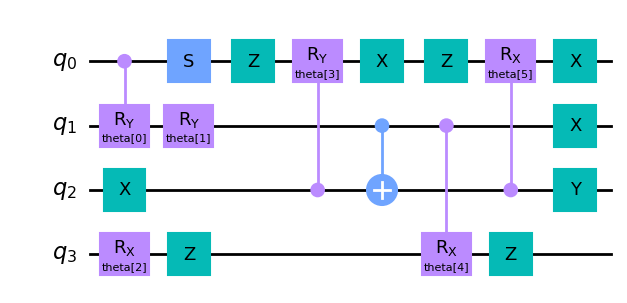

In [10]:
qc.draw('mpl')